In [1]:
import numpy as np
import pandas as pd

In [2]:
#Preparing train data
train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None)
train['Subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)
train['Activity'] = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', header=None, squeeze=True)
train['ActivityName'] = train['Activity'].map({1:'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
print(train.shape)

(7352, 564)


In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,Subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
#Preparing test data
test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None)
test['Subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)
test['Activity'] = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt',header=None,squeeze=True)
test['ActivityName'] = test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
print(test.shape)

(2947, 564)


In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,Subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [6]:
#Checking for duplicate values
print('No of duplicates in train : {}'.format(sum(train.duplicated())))
print('No of duplicates in test  : {}'.format(sum(test.duplicated())))

No of duplicates in train : 0
No of duplicates in test  : 0


In [7]:
#Checking for NaN or Null values
print('No. of NaN/Null values in train : {}'.format(train.isnull().values.sum()))
print('No. of NaN/Null values in test  : {}'.format(test.isnull().values.sum()))

No. of NaN/Null values in train : 0
No. of NaN/Null values in test  : 0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

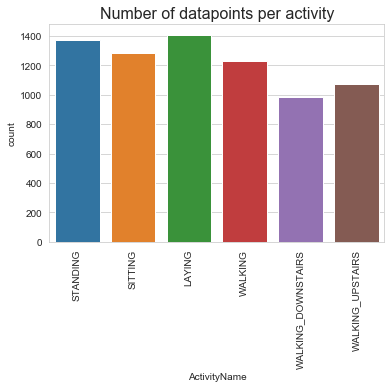

In [9]:
#Checking if data is balanced
sns.set_style('whitegrid')
plt.title('Number of datapoints per activity', fontsize=16)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [10]:
#Saving dataframes in csv files
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [58]:
data = train.drop(['Subject', 'Activity','ActivityName'], axis=1)
label = train['ActivityName']

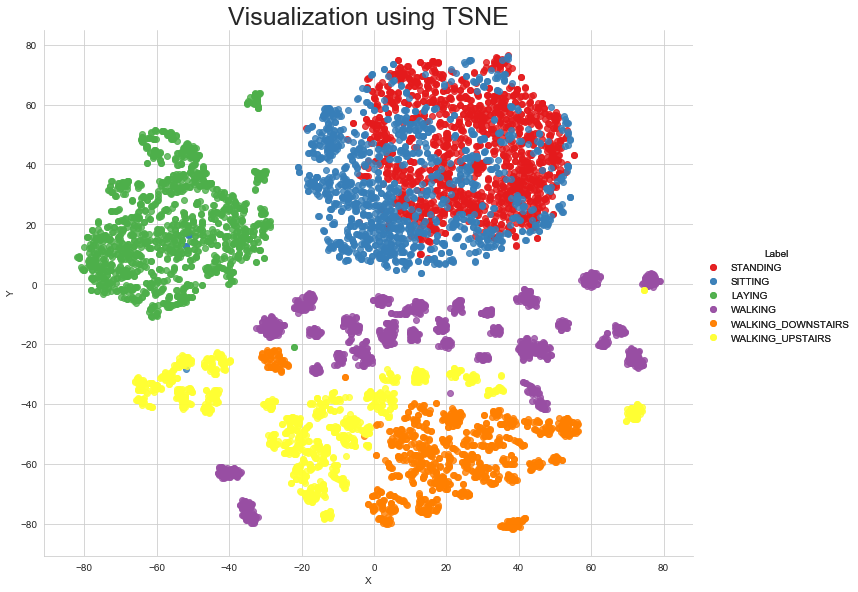

In [65]:
#Applying T-SNE for visualisation
tsne_data = TSNE(perplexity=30, n_iter=1000).fit_transform(data) #verbose=2 for detailed output
tsne_df = pd.DataFrame({'X':tsne_data[:,0], 'Y':tsne_data[:,1] ,'Label':label})
g=sns.lmplot(data=tsne_df, x='X', y='Y', hue='Label', fit_reg=False, height=8, palette="Set1")
g.add_legend()
plt.title("Visualization using TSNE",fontsize=25)
plt.show()
g.savefig("TSNE.png")

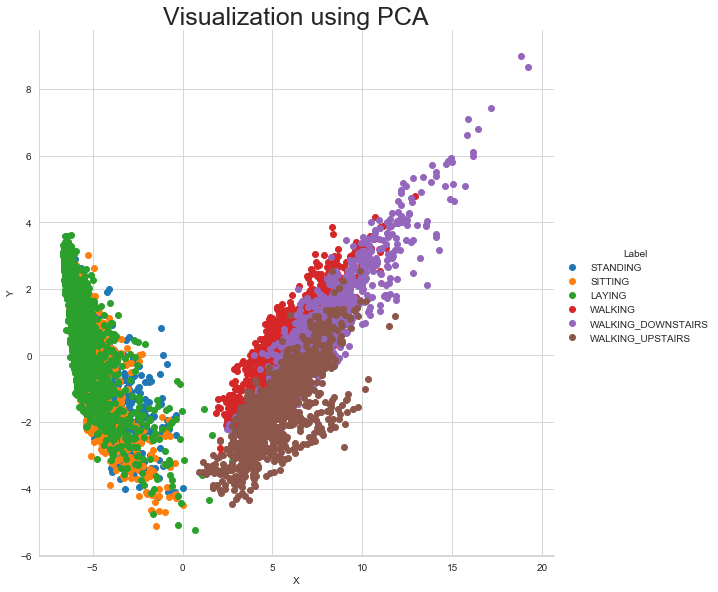

In [63]:
#Applying PCA for visualisation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data) #(7352,2)
pca_data = np.vstack((pca_data.T, label)).T #(7352,3)
pca_df = pd.DataFrame(data=pca_data, columns=("X","Y","Label"))
g = sns.FacetGrid(pca_df, hue="Label",height=8).map(plt.scatter,"X","Y")
g.add_legend()
plt.title("Visualization using PCA",fontsize=25)
plt.show()
g.savefig("PCA.png")